In [65]:
import pandas as pd

In [66]:
shayneDf = pd.read_csv("/local/storage/rhlin_to_copy/CloneSeqExample/Mutations_Summary.txt", sep="\t")
sdf_a = shayneDf[shayneDf["Colony"] == "B"].sort_values(by = "Identifier")
sdf_a = sdf_a[ \
            ['ORF', 'Colony', 'Identifier', 'Desired Mutation Detected', \
             'Undesired Mutations Detected', 'Clean', 'Usable', 'Desired Mutation Score'] \
            ]
sdf_a = sdf_a.rename(columns = {"Desired Mutation Detected": "Status", \
                              "Undesired Mutations Detected": "Other Muts", "Usable": "Successful"}) \
                        .reset_index(drop=True)
sdf_a

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Desired Mutation Score
0,10002,B,10002_T743A_B,True,[],True,True,0.990519
1,10011,B,10011_G799A_B,True,[],True,True,1.004031
2,10016,B,10016_C1014G_B,True,[],True,True,1.001688
3,10037,B,10037_G1595C_B,True,[],True,True,1.213148
4,10037,B,10037_T1139G_B,True,[],True,True,0.791636
...,...,...,...,...,...,...,...,...
1654,9969,B,9969_G1228A_B,True,[],True,True,1.008668
1655,9970,B,9970_A377G_B,True,[],True,True,1.018272
1656,9989,B,9989_C596T_B,True,[],True,True,0.998107
1657,9990,B,9990_G1237A_B,True,[],True,True,1.047009


In [67]:
df_b = pd.read_csv(\
        "/local/storage/rhlin/ESP_7_output/ESP_7_B_trimmed_Summary.txt", \
        sep="\t", header = None) \
        .rename(columns = {0: "ORF", 1: "Colony", 2: "Identifier", 3: "Status", 4: "Other Muts", \
                           5: "Clean", 6: "Successful", 7: "Score"}) \
        .sort_values(by = "Identifier") \
        .reset_index(drop=True)
df_b

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Score
0,10002,B,10002_T743A_B,True,['10002_G6T'],False,False,-1.000000e+00
1,10011,B,10011_G799A_B,True,['10011_G1317T'],False,False,-1.000000e+00
2,10016,B,10016_C1014G_B,True,[],True,True,0.000000e+00
3,10037,B,10037_G1595C_B,True,[],True,True,-1.110223e-16
4,10037,B,10037_T1139G_B,True,[],True,True,-4.032230e+01
...,...,...,...,...,...,...,...,...
1654,9969,B,9969_G1228A_B,True,[],True,True,0.000000e+00
1655,9970,B,9970_A377G_B,True,[],True,True,0.000000e+00
1656,9989,B,9989_C596T_B,True,['9989_C1242A'],False,False,-2.192491e+00
1657,9990,B,9990_G1237A_B,True,[],True,True,-2.392661e-01


In [68]:
df_wt = pd.read_csv(\
        "/local/storage/rhlin/ESP_7_output/ESP_7_WT_trimmed_Summary.txt", \
        sep="\t", header = None) \
        .rename(columns = {0: "ORF", 1: "Colony", 2: "Identifier", 3: "Status", 4: "Other Muts", \
                           5: "Clean", 6: "Successful", 7: "Score"}) \
        .sort_values(by = "Identifier") \
        .reset_index(drop=True)
df_wt

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Score
0,10002,W,10002_T743A_W,False,['10002_G6T'],False,False,-inf
1,10011,W,10011_G799A_W,False,['10011_G1317T'],False,False,-inf
2,10016,W,10016_C1014G_W,False,[],True,False,-inf
3,10037,W,10037_G1595C_W,False,[],True,False,-inf
4,10037,W,10037_T1139G_W,False,[],True,False,-inf
...,...,...,...,...,...,...,...,...
1654,9969,W,9969_G1228A_W,False,[],True,False,-inf
1655,9970,W,9970_A377G_W,False,[],True,False,-inf
1656,9989,W,9989_C596T_W,False,['9989_C1242A'],False,False,-inf
1657,9990,W,9990_G1237A_W,False,[],True,False,-744.440072


In [69]:
df_b["Identifier_new"] = df_b["Identifier"].apply(lambda x: x[0:-2])
df_wt["Identifier_new"] = df_wt["Identifier"].apply(lambda x: x[0:-2])
df_wt = df_wt.rename(columns = {"Other Muts": "Other Muts WT"})

In [70]:
df_merge = pd.merge(df_b, df_wt[["Identifier_new", "Other Muts WT"]].drop_duplicates(), on = ["Identifier_new"], how = "left")
df_merge["Other Muts"] = df_merge.apply(lambda row: list(set(eval(row["Other Muts"])) - set(eval(row["Other Muts WT"]))), axis = 1)

In [71]:
df_merge["Clean"] = df_merge["Other Muts"].apply(lambda x: len(x) == 0)

In [72]:
df_richard = df_merge.sort_values(by="Identifier")[["Identifier", "Status", "Other Muts", "Clean", "Successful"]]
df_richard

,Identifier,Status,Other Muts,Clean,Successful
0,10002_T743A_B,True,[],True,False
1,10011_G799A_B,True,[],True,False
2,10016_C1014G_B,True,[],True,True
3,10037_G1595C_B,True,[],True,True
4,10037_T1139G_B,True,[],True,True
...,...,...,...,...,...
1654,9969_G1228A_B,True,[],True,True
1655,9970_A377G_B,True,[],True,True
1656,9989_C596T_B,True,[],True,False
1657,9990_G1237A_B,True,[],True,True


In [73]:
df_shayne = sdf_a[["Identifier", "Status", "Other Muts", "Clean", "Successful"]]
df_shayne

,Identifier,Status,Other Muts,Clean,Successful
0,10002_T743A_B,True,[],True,True
1,10011_G799A_B,True,[],True,True
2,10016_C1014G_B,True,[],True,True
3,10037_G1595C_B,True,[],True,True
4,10037_T1139G_B,True,[],True,True
...,...,...,...,...,...
1654,9969_G1228A_B,True,[],True,True
1655,9970_A377G_B,True,[],True,True
1656,9989_C596T_B,True,[],True,True
1657,9990_G1237A_B,True,[],True,True


In [74]:
df_compare = pd.merge(df_richard, df_shayne, on = ["Identifier"], how = "left")
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(lambda x: eval(x))
df_compare

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
0,10002_T743A_B,True,[],True,False,True,[],True,True
1,10011_G799A_B,True,[],True,False,True,[],True,True
2,10016_C1014G_B,True,[],True,True,True,[],True,True
3,10037_G1595C_B,True,[],True,True,True,[],True,True
4,10037_T1139G_B,True,[],True,True,True,[],True,True
...,...,...,...,...,...,...,...,...,...
1654,9969_G1228A_B,True,[],True,True,True,[],True,True
1655,9970_A377G_B,True,[],True,True,True,[],True,True
1656,9989_C596T_B,True,[],True,False,True,[],True,True
1657,9990_G1237A_B,True,[],True,True,True,[],True,True


In [75]:
status = df_compare[df_compare["Status_x"] != df_compare["Status_y"]]

In [94]:
len(status)
status

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
97,11165_T562C_B,True,[],True,True,False,[T546Gap Before],False,False
181,11922_C146A_B,False,[],True,False,True,[],True,True
258,13320_C241T_B,True,[13320_C505T],False,False,False,[C505T],False,False
305,13876_G367A_B,True,[],True,True,False,[],True,False
316,14011_C138G_B,True,[],True,True,False,[],True,False
336,14312_A703G_B,False,[],True,False,True,[],True,True
388,14906_G463A_B,True,[],True,True,False,[],True,False
403,1553_G536C_B,True,[],True,True,False,[],True,False
600,27_C480G_B,False,[],True,False,True,[],True,True
634,3078_G206A_B,True,"[3078_A701G, 3078_A682G, 3078_T781G]",False,False,False,[A682G],False,False


In [ ]:
# 14312_A703G_B: should have undesired mut?

In [77]:
def parse_variants(x):
    return sorted([item.split("_")[1] for item in x])
df_compare["Other Muts_x"] = df_compare["Other Muts_x"].apply(parse_variants)
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(lambda x: sorted(x))

In [104]:
def removeIndels(otherMuts):
    return [x for x in otherMuts if not "Gap" in x and not "Missing" in x]
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(removeIndels)

In [105]:
ot_comparison = df_compare[df_compare["Other Muts_x"] != df_compare["Other Muts_y"]]

In [106]:
ot_comparison

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
149,116_G531T_B,True,[A630G],False,False,True,[],True,True
443,1853_A631G_B,True,[C849A],False,False,True,[],True,True
444,1853_C178T_B,True,[C849A],False,False,True,[],True,True
633,3078_A412G_B,True,"[A682G, A701G, T781G]",False,False,True,[A682G],False,False
634,3078_G206A_B,True,"[A682G, A701G, T781G]",False,False,False,[A682G],False,False
635,3078_T296C_B,True,"[A682G, A701G, T781G]",False,False,False,[A682G],False,False
753,4015_G334A_B,False,[],True,False,True,[C100A],False,False
808,450_C173T_B,True,[C15T],False,False,True,[],True,True
846,4727_A322T_B,True,"[A202T, A82T, C102T, C487A, C78T, G124C, G131C...",False,False,True,"[A202T, A82T, C487A, C78T, T213C, T342C]",False,False
847,4727_T454C_B,False,"[A202T, A82T, C102T, C487A, C78T, G124C, G131C...",False,False,False,"[A202T, A82T, C487A, C78T, T213C, T342C]",False,False


In [81]:
# 754	4019_A65G_B	True	[G409A]	False	False	True	[]	True	True

In [82]:
test = ot_comparison[(ot_comparison["Identifier"] == "4015_G334A_B")]

In [83]:
test[["Identifier", "Other Muts_x", "Clean_x", "Other Muts_y", "Clean_y"]]

,Identifier,Other Muts_x,Clean_x,Other Muts_y,Clean_y
753,4015_G334A_B,[],True,[C100A],False


In [87]:
import matplotlib.pyplot as plt

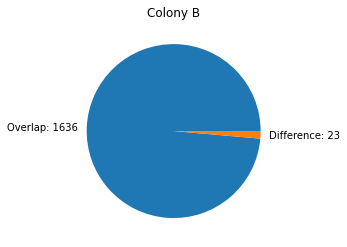

In [93]:
title = plt.title("Colony B")
pie_chart = plt.pie(x=[1636, 23], labels=["Overlap: 1636", "Difference: 23"])

In [107]:
len(ot_comparison)

50

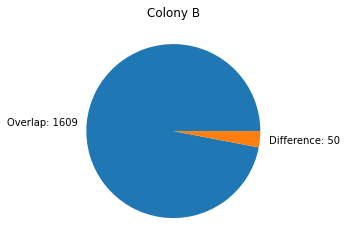

In [109]:
title = plt.title("Colony B")
pie_chart = plt.pie(x=[1609, 50], labels=["Overlap: 1609", "Difference: 50"])

In [ ]:
# Both methods miss unwanted mutations for 14312_A703G_B